In [47]:
#Import library yang dibutuhkan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print ('sukses')

sukses


In [48]:
#Mengimpor file csv yang ingin digunakan

sel = pd.read_csv('/Users/cahyopambudiutomo/Documents/Purwadhika/Ujian/Exam-Data-Analytics-Visualization-master-2/seluler.csv')

In [49]:
#Melihat 5 data teratas
sel.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1. Business Problem

- Berdasarkan data set yang ada, dapat dilihat bahwa terdapat kolom churn yang memiliki value yes, berarti ada beberapa pelanggan yang pindah provider dan ini tidak baik untuk bisnis provider
- Terdapat beberapa jenis layanan yang tidak digunakan oleh pelanggan, jadi masih ada room for improvement untuk bisa menarik pelanggan agar mau memakai layanan lain yang belum dipilih

# 2. Goals

- Melihat pola dan menarik insight berdasar data untuk mengetahui alasan kenapa ada pelanggan yang pindah ke provider lain, dimana nantinya insight tersebut bisa menjadi rekomendasi untuk meminimalisir pelanggan yang pindah ke provider lain
- Melihat korelasi antar data yang ada (misal apakah usia berpengaruh kepada ketertarikan terhadap suatu jenis layanan) untuk menjadi dasar rekomendasi untuk menggencarkan promosi layanan yang belum dipakai oleh para pelanggan

# 3. Analisa Deskriptif dan Handling Missing Values serta Outliers

In [50]:
# Describing data
sel.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [51]:
# Describing Data Object
sel.describe(include=np.object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,5566-SOEZD,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [52]:
# Melihat tipe data
sel.dtypes

#Kolom Total Charges masih bertipe object, harus diubah karena kolom tersebut akan digunakan untuk
#mengetahui apakah dia pelanggan lama atau baru

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [53]:
sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [54]:
# Mengecek jumlah null
sel.isnull().sum()

#Output dibawah menunjukkan bahwa tidak terdapat NULL values pada dataset ini

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [55]:
# Cek Unique Value

for i in sel.columns:
    print(i)
    print(sel[i].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [56]:
# Ubah tipe data di kolom TotalCharges
sel['TotalCharges']= sel['TotalCharges'].replace(r'\s+', np.nan, regex=True)
sel['TotalCharges']= pd.to_numeric(sel['TotalCharges'])

In [57]:
sel.dtypes

#TotalCharges sudah menjadi float (numerik)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [58]:
sel.isnull().sum()

#terdapat null value di kolom TotalCharges, akan di handling dengan mengganti null tersebut dengan 0
#karena null value jumlahnya sedikit(11), maka info di totalcharges tersebut akan di handling dengan diganti menjadi 0

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [59]:
# Handling Missing Values
sel=sel.fillna(value=0)

In [60]:
sel.isnull().sum()

#Sudah tidak ada missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [61]:
# Melihat jumlah yang pindah provider dan tidak
pindah= len(sel[sel['Churn']=='Yes'])
print (f'Jumlah Pindah: {pindah}')

tidak_pindah= len(sel[sel['Churn']=='No'])
print (f'Jumlah Tidak Pindah: {tidak_pindah}')

jumlah_churn=(pindah+tidak_pindah)
print (f'Jumlah churn: {jumlah_churn}, jumlah total data churn seharusnya 7043')

# Setelah dikonversi, jumlah data churn masih sama dengan sebelumnya (7043)

Jumlah Pindah: 1869
Jumlah Tidak Pindah: 5174
Jumlah churn: 7043, jumlah total data churn seharusnya 7043


In [62]:
# Cek Outliers di Monthly Charges

sel.describe()['MonthlyCharges']

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [63]:
Q1 = sel.describe()['MonthlyCharges']['25%']
Q3 = sel.describe()['MonthlyCharges']['75%']
IQR = Q3 - Q1
Upper_Fence = Q3 + (1.5 * IQR)
Lower_Fence = Q1 - (1.5 * IQR)

In [64]:
## Data Outliers
sel[(sel['MonthlyCharges'] < Lower_Fence) | (sel['MonthlyCharges'] > Upper_Fence)]

# Berdasar pemeriksaan Outliers, tidak terdapat outliers

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


# 4. Analisis Data

In [65]:
# Crosstab

pd.crosstab(sel['Churn'],columns='jumlah')

col_0,jumlah
Churn,
No,5174
Yes,1869


In [66]:
pd.crosstab(sel['gender'],columns='jumlah')

col_0,jumlah
gender,
Female,3488
Male,3555


In [67]:
pd.crosstab(index=[sel['PhoneService'], sel['InternetService'],sel['StreamingTV'],sel['StreamingMovies']],
            columns=[sel['gender']]).T

#Melihat Variasi layanan yang digunakan oleh user berdasarkan jenis kelamin

PhoneService      No               Yes                                       \
InternetService  DSL               DSL                Fiber optic             
StreamingTV       No     Yes        No       Yes               No       Yes   
StreamingMovies   No Yes  No  Yes   No  Yes   No  Yes          No  Yes   No   
gender                                                                        
Female           140  51  37  103  391  125  120  221         459  220  223   
Male             159  47  48   97  423  128  122  209         446  221  217   

PhoneService                              
InternetService                       No  
StreamingTV          No internet service  
StreamingMovies  Yes No internet service  
gender                                    
Female           651                 747  
Male             659                 779

In [68]:
pd.pivot_table(data=sel, index=sel['Churn'])

# Melihat korelasi antara pelanggan yang pindah provider dengan tagihan bulanan (Monthly Charges), usia, 
# total tagihan selama ini(Total Charges), dan durasi keterikatan (tenure) 

,MonthlyCharges,SeniorCitizen,TotalCharges,tenure
Churn,,,,
No,61.265124,0.128721,2549.911442,37.569965
Yes,74.441332,0.254682,1531.796094,17.979133


In [69]:
pd.pivot_table(data=sel, index=sel['gender'])

# Melihat korelasi antara jenis kelamin pelanggan dengan tagihan bulanan (Monthly Charges), usia, 
# total tagihan selama ini(Total Charges), dan durasi keterikatan (tenure) 

,MonthlyCharges,SeniorCitizen,TotalCharges,tenure
gender,,,,
Female,65.204243,0.162844,2279.918062,32.244553
Male,64.327482,0.161463,2279.554008,32.495359


#### Melihat Persebaran Data

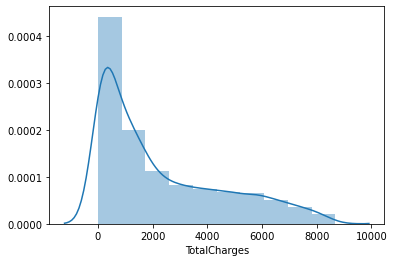

In [70]:
sns.distplot(sel['TotalCharges'],bins=10)

plt.show()

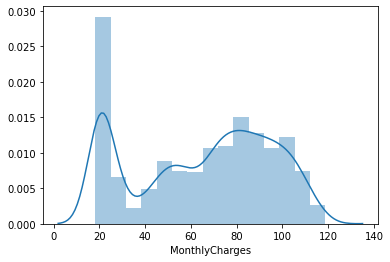

In [71]:
sns.distplot(sel['MonthlyCharges'],bins=15)

plt.show()

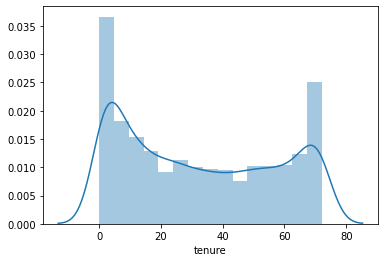

In [72]:
sns.distplot(sel['tenure'],bins=15)

plt.show()

Berdasar plottingan persebaran data, dapat terlihat bahwa data tidak terdistribusi secara normal

# 5. Visualisasi Data

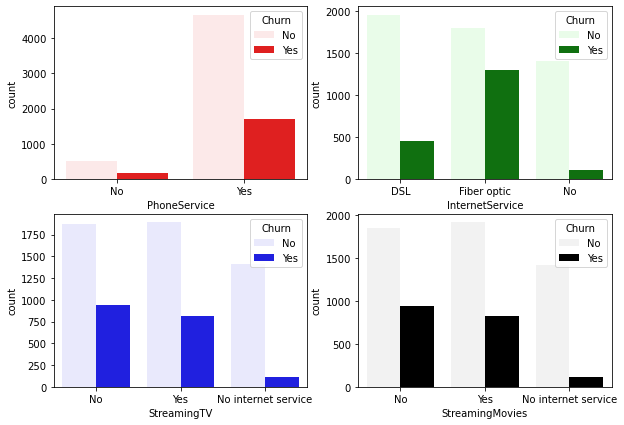

In [73]:
#Korelasi antara Churn dengan jenis layanan

fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(10,7))
sns.countplot('PhoneService', hue='Churn', data=sel, color='red', ax=ax[0,0])
sns.countplot('InternetService', hue='Churn', data=sel, color='green', ax=ax[0,1])
sns.countplot('StreamingTV', hue='Churn', data=sel, color='blue', ax=ax[1,0])
sns.countplot('StreamingMovies', hue='Churn', data=sel, color='black', ax=ax[1,1])

plt.show()

### Analisis dari Visual Di Atas

- Terlihat pada grafik diatas, bahwa pelanggan yang pindah provider paling banyak ada pada pemakai layanan internet bertipe fiber optic
- Banyak pelanggan yang pindah provider merupakan pengguna layanan telepon

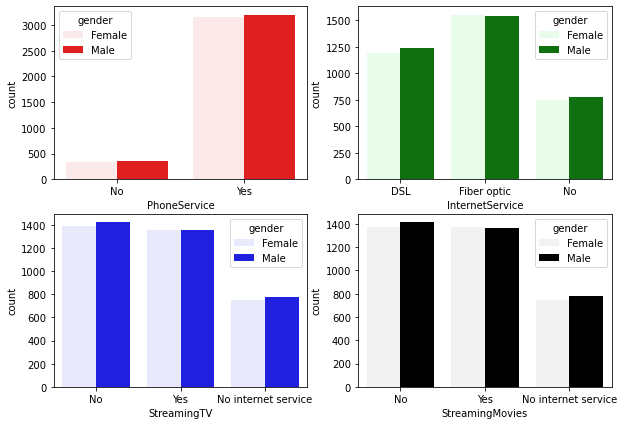

In [74]:
#Korelasi antara Jenis Kelamin dengan jenis layanan

fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(10,7))
sns.countplot('PhoneService', hue='gender', data=sel, color='red', ax=ax[0,0])
sns.countplot('InternetService', hue='gender', data=sel, color='green', ax=ax[0,1])
sns.countplot('StreamingTV', hue='gender', data=sel, color='blue', ax=ax[1,0])
sns.countplot('StreamingMovies', hue='gender', data=sel, color='black', ax=ax[1,1])

plt.show()

### Analisis dari Visual Di Atas

- Terlihat pada grafik diatas, bahwa jenis layanan yang dipakai tidak ada kaitannya dengan jenis kelamin, karena grafiknya relatif sama tinggi

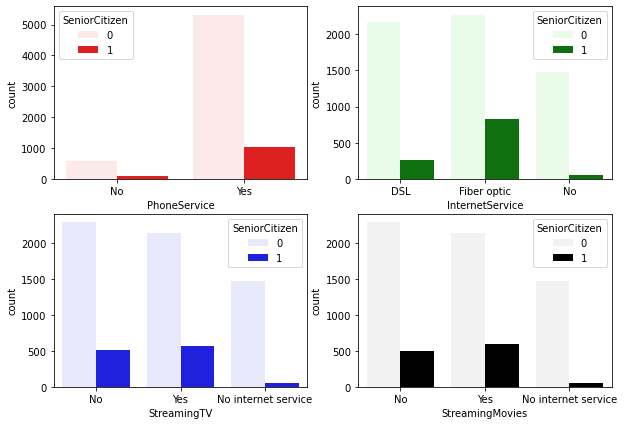

In [75]:
#Korelasi antara Usia Pelanggan dengan jenis layanan

fig, ax=plt.subplots(nrows=2, ncols=2, figsize=(10,7))
sns.countplot('PhoneService', hue='SeniorCitizen', data=sel, color='red', ax=ax[0,0])
sns.countplot('InternetService', hue='SeniorCitizen', data=sel, color='green', ax=ax[0,1])
sns.countplot('StreamingTV', hue='SeniorCitizen', data=sel, color='blue', ax=ax[1,0])
sns.countplot('StreamingMovies', hue='SeniorCitizen', data=sel, color='black', ax=ax[1,1])

plt.show()

### Analisis dari Visual Di Atas

- Terlihat pada grafik diatas, bahwa pelanggan yang berusia senior lebih sedikit dalam menggunakan layanan yang tersedia dibandingkan yang non usia senior

# 6. Insight

- Berdasarkan analisis data dan visualisasinya, dapat terlihat bahwa jenis kelamin tidak berpengaruh terhadap layanan yang dipakai
- Usia pelanggan yang senior lebih sedikit dalam memakai layanan dibanding dengan non senior
- Pelanggan yang pindah provider paling banyak terjadi pada pelanggan yang memakai jenis layanan Internet dengan jenis Fiber Optic

# 7. Kesimpulan dan Saran

- Provider sebaiknya melakukan evaluasi terhadap layanan internet dengan jenis fiber optic, karena di jenis layanan tersebut banyak pelanggan yang pindah ke provider lain (takutnya layanan kurang optimal)
- Untuk strategi promosi, tidak perlu melakukan promosi yang lebih condong ke suatu jenis kelamin, karena ternyata baik laki-laki maupun perempuan menggunakan layanan yang cenderung sama